# Exercise: Inference of admixture and population structure

## A. Use of NGSadmix to infer admixture proportions for numerous individuals

In this exercise we will try to use NGSadmix to analyze a NGS dataset and evalAdmix to assess the results.

###  Login to the server and set paths
First run the following code to set the paths to all programs and data needed:

In [39]:
# shared tools and data folder
source /home/student/USER/miniconda.sh
conda activate anders
TOOL_PATH=/home/student/opt/anders # for standalone tool script including java package
SHARED_PATH=/home/tch_wyd/myname/shared # For reference database
INPUT_PATH=/home/tch_wyd/myname/inputs/admixture  # for input data

(anders) (base) (anders) (anders) (anders) (anders) 


In [2]:
# Set path to ANGSD program
ANGSD=angsd
# Set path to NGSadmix
NGSadmix=NGSadmix
EVALADMIX=evalAdmix
fastNGSadmix=fastNGSadmix

# Set path to a bam file list with several bam files

BAMFOLDER=${INPUT_PATH}/smallbams

ls ${BAMFOLDER} |wc -l

(anders) (anders) (anders) (anders) (anders) (anders) (anders) (anders) (anders) (anders) (anders) 870
(anders) 


In [3]:
# Make directory for all the results
mkdir -p ~/sysu_day4_admixture
cd ~/sysu_day4_admixture

mkdir -p ./scripts
mkdir -p ./resource

cp -sf ${SHARED_PATH}/visFuns.R ./scripts/
cp -sf ${INPUT_PATH}/1000G5pops.info ./resource/
cp -sf ${INPUT_PATH}/1000G5pops.beagle.gz ./resource/
cp -sf ${INPUT_PATH}/nInd.txt ./resource/
cp -sf ${INPUT_PATH}/sample*.gz ./resource/
cp -sf ${INPUT_PATH}/refPanel.txt ./resource/
cp -sf /home/tch_myname/admixture_data/admix_bonus_quiz*.json ./

ln -sf ${INPUT_PATH}/ngsadmix_out ./resource/

(anders) (anders) (anders) (anders) (anders) (anders) (anders) (anders) (anders) (anders) (anders) (anders) (anders) (anders) (anders) (anders) 


In [4]:
# set up R working space
work_d <- path.expand("~/sysu_day4_admixture")
setwd(work_d)

# Import some functions to help in visualization
source("/home/tch_wyd/myname/shared/visFuns.R")

In [5]:
# set up python working space
import os
work_d = os.path.expanduser("~/sysu_day4_admixture")
os.chdir(work_d)

## First small example

We will first try to run an NGSadmix analysis of a small dataset consisting of bam files with low depth NGS data from 435 samples of 5 human populations from the 1000 genomes project:


| Population code | Population                                     | Sample size |
|-----------------|------------------------------------------------|-------------|
| ASW             | HapMap African ancestry individuals from SW US | 61          |
| CEU             | European individuals                           | 99          |
| CHB             | Han Chinese in Beijing                         | 103         |
| YRI             | Yoruba individuals from Nigeria                | 108         |
| MXL             | Mexican individuals from LA California         | 63          |


### Make input data using ANGSD

The input to NGSadmix is genotype likelihoods (GLs). Therefore the first step of running an NGSadmix analysis (if all you have are bams files) is to calculate GLs. So let's start bying doing that. First make a file that contains the paths of all the 30 bam files:

In [6]:
find $BAMFOLDER |  grep bam$ > all.files
wc -l all.files

(anders) 435 all.files
(anders) 


To see the content of the file you made type:

In [7]:
cat all.files |head -n 10

/home/tch_wyd/myname/inputs/admixture/smallbams/small.NA19731.mapped.ILLUMINA.bwa.MXL.low_coverage.20120522.bam
/home/tch_wyd/myname/inputs/admixture/smallbams/small.NA07037.mapped.ILLUMINA.bwa.CEU.low_coverage.20130502.bam
/home/tch_wyd/myname/inputs/admixture/smallbams/small.NA18611.mapped.ILLUMINA.bwa.CHB.low_coverage.20120522.bam
/home/tch_wyd/myname/inputs/admixture/smallbams/small.NA19679.mapped.ILLUMINA.bwa.MXL.low_coverage.20120522.bam
/home/tch_wyd/myname/inputs/admixture/smallbams/small.NA18868.mapped.ILLUMINA.bwa.YRI.low_coverage.20120522.bam
/home/tch_wyd/myname/inputs/admixture/smallbams/small.NA19121.mapped.ILLUMINA.bwa.YRI.low_coverage.20130415.bam
/home/tch_wyd/myname/inputs/admixture/smallbams/small.NA19116.mapped.ILLUMINA.bwa.YRI.low_coverage.20120522.bam
/home/tch_wyd/myname/inputs/admixture/smallbams/small.NA18632.mapped.ILLUMINA.bwa.CHB.low_coverage.20130415.bam
/home/tch_wyd/myname/inputs/admixture/smallbams/small.NA18504.mapped.ILLUMINA.bwa.YRI.low_coverage.20120

In [8]:

from jupyterquiz import display_quiz
display_quiz('admix_bonus_quiz1.json')


<IPython.core.display.Javascript object>

Now calculate GLs from all the BAM files using ANGSD by running the following command in the terminal:

In [9]:
#ANGSD \
#    -bam all.files \
#    -GL 2 \
#    -doMajorMinor 1 \
#    -doMaf 1 \
#    -SNP_pval 2e-6 \
#    -minMapQ 30 \
#    -minQ 20 \
#    -minInd 25 \
#    -minMaf 0.05 \
#    -doGlf 2 \
#    -out all \
#    -P 2

(anders) (anders) (anders) (anders) (anders) (anders) (anders) (anders) (anders) (anders) (anders) (anders) (anders) 


Note that this will take a bit of time to run (around a minute). We just copy the resulting files (pre-made by us) by typing.

But please try to figure out what the different options of angsd mean. If you do not remember all of them, then try to ask the person next to you. And if neither of you remember then try to figure it out by looking for help on the ANGSD webpage e.g. [here](http://www.popgen.dk/angsd/index.php/Genotype_Likelihoods), [here](http://www.popgen.dk/angsd/index.php/Major_Minor) and [here](http://www.popgen.dk/angsd/index.php/Filters).



In [10]:
cp ${INPUT_PATH}/angsd_out/* .

(anders) 


## Explore the input data

Now let's have a look at the GL file that you have created with ANGSD. It is a "beagle format" file called all.beagle.gz - and will be the input file to NGSadmix. The first line in this file is a header line and after that it contains a line for each site with GLs. By using the unix command wc we can count the number of lines in the file:

In [38]:
zcat all.beagle.gz | wc -l

1307
(anders) 


- Use this to find out how many loci there are GLs for in the data set.

Next, to get an idea of what the GL file contains, print the first 9 columns of the first 7 lines of the file:

In [12]:
zcat all.beagle.gz | awk '(NR<=7)' | cut -f 1-9 | column -t

marker      allele1  allele2  Ind0      Ind0      Ind0      Ind1      Ind1      Ind1
1_20018051  2        1        0.000559  0.333333  0.666108  0.941172  0.058828  0.000000
1_20018077  1        3        0.000267  0.999733  0.000000  0.969690  0.030310  0.000000
1_20018091  3        1        0.000846  0.999154  0.000000  0.984609  0.015391  0.000000
1_20018096  2        0        0.000000  0.998312  0.001688  0.032626  0.967374  0.000000
1_20018195  2        0        0.941169  0.058831  0.000000  0.969683  0.030317  0.000000
1_20050859  3        1        0.000000  0.111128  0.888872  0.999023  0.000977  0.000000
(anders) 


Interpretation: In general, the first three columns of a beagle file contain marker name and the two alleles, allele1 and allele2, present in the locus (in beagle A=0, C=1, G=2, T=3). All following columns contain genotype likelihoods (three columns for each individual: first GL for homozygote for allele1, then GL for heterozygote and then GL for homozygote for allele2). Note that the GL values sum to one per site for each individuals. This is just a normalization of the genotype likelihoods in order to avoid underflow problems in the beagle software it does not mean that they are genotype probabilities.

- Based on this, please answer the quiz:

In [13]:

from jupyterquiz import display_quiz
display_quiz('admix_bonus_quiz2.json')


<IPython.core.display.Javascript object>

## Run an analysis of the data with NGSadmix

Now you know how the input looks. Next, let's try to perform an NGSadmix analyses of the GLs typing assuming the number of ancestral populations, K, is 3:

In [14]:
$NGSadmix -likes all.beagle.gz -K 3 -minMaf 0.05 -seed 1 -o all

Input: lname=all.beagle.gz nPop=3, fname=(null) qname=(null) outfiles=all
Setup: seed=1 nThreads=1 method=1
Convergence: maxIter=2000 tol=0.000010 tolLike50=0.100000 dymBound=0
Filters: misTol=0.050000 minMaf=0.050000 minLrt=0.000000 minInd=0
Input file has dim: nsites=1306 nind=435
Input file has dim (AFTER filtering): nsites=1306 nind=435
iter[start] like is=725007.646639
iter[50] like is=-454726.015786 thres=0.010253
iter[100] like is=-454476.133576 thres=0.007410
EM accelerated has reached convergence with tol 0.000010
best like=-454474.778286 after 145 iterations
	-> Dumpedfiles are: all.log
	-> Dumpedfiles are: all.qopt
	-> Dumpedfiles are: all.fopt.gz
	[ALL done] cpu-time used =  15.84 sec
	[ALL done] walltime used =  16.00 sec
(anders) 


- When it is done you will see some output above. While waiting for the analysis to finish running please make sure you understand the command you ran. If you are in doubt seek help [here](http://www.popgen.dk/software/index.php/NgsAdmix#Parameters). Here you can also see what other options you have when you run an NGSadmix analyses.


## Explore the output

The output from the analysis you just ran is three files:

- all.log (a "log file" that summarizes the analysis run)
- all.fopt.gz (an "fopt file", which has a line for each locus that contains an estimate of the allele frequency in each of the 3 assumed ancestral populations)
- all.qopt (a "qopt file", which has a line for each individual that contains anestimate of the individual's ancestry proportion from each of the three assumed ancestral populations).

Let's have a look at them one at a time. First, check the log file by typing

In [15]:
cat all.log

Input: lname=all.beagle.gz nPop=3, fname=(null) qname=(null) outfiles=all
Setup: seed=1 nThreads=1 method=1
Convergence: maxIter=2000 tol=0.000010 tolLike50=0.100000 dymBound=0
Filters: misTol=0.050000 minMaf=0.050000 minLrt=0.000000 minInd=0
Input file has dim: nsites=1306 nind=435
Input file has dim (AFTER filtering): nsites=1306 nind=435
	[ALL done] cpu-time used =  15.84 sec
	[ALL done] walltime used =  16.00 sec
best like=-454474.778286 after 145 iterations
(anders) 


- What is the log likelihood of the estimates achieved by NGSadmix (called "best like" in the log file)?

Next, check the first line of the fopt file by typing:

In [16]:
zcat all.fopt.gz | head -n1

0.29904640512855990009 0.38077570967368778998 0.74494733277312485953 

gzip: stdout: Broken pipe
(anders) 


- Based on this: what is the estimated allele frequency at the first locus in the three assumed ancestral populations?

Finally, check the first line of the qopt file and thus the estimated admixture proportions for the first individuals by typing:

In [17]:
head -n1 all.qopt

0.25728246424542178250 0.00000000150899110112 0.74271753424558706325 
(anders) 


- Based on this: does the individual look admixed?

You can see the ID of the first individual by getting the first line of the file you created with all your original bam files in the beginning:

In [18]:
head -n1 all.files | xargs basename

small.NA19731.mapped.ILLUMINA.bwa.MXL.low_coverage.20120522.bam
(anders) 


- Based on that ID, which population does the individual come from?
- Based on this and the frequency estimates for the first locus that you looked at earlier, what does NGSadmix estimate the allele frequency to be at the first locus in that population?

## Plot the admixture proportion estimates

Finally, try to make a simple plot the estimated admixture proportions for all the individuals by opening the statistical program called R (which you do by typing "R" in the terminal and pressing enter) and then copy pasting the following code:

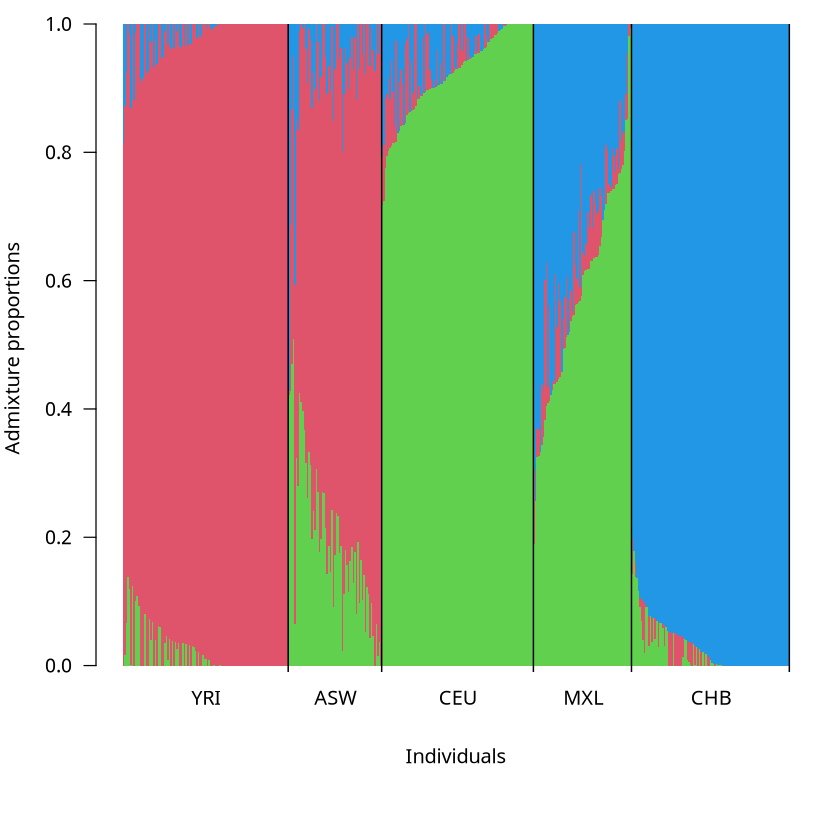

In [19]:
# Get ID and pop info for each individual
filenames <- basename(readLines("all.files"))
pop <- sapply(strsplit(filenames, "\\."), `[`, 6)

# Read in inferred admixture proportions
q <- read.table("all.qopt")

# Order individuals by population, and within population by admixture proportion
ord <- orderInds(pop = pop, q = q, popord = c("YRI", "ASW", "CEU", "MXL", "CHB"))

# Make plot            
par(mar = c(7,4,1,1))
barplot(t(q)[,ord], col = c(3,2,4), las = 2, xlab = "Individuals", ylab = "Admixture proportions", space = 0, border = NA)
text(sort(tapply(1:length(pop),pop[ord],mean)), -0.05, unique(pop[ord]), xpd=NA)
abline(v = cumsum(sapply(unique(pop[ord]), function(x) { sum(pop[ord]==x) })), col = 1, lwd = 1.2)

Note that the order of the individuals in the plot are not the same as in the qopt file. Instead, to provide a better overview, the individuals have been ordered according to the population they are sampled from.

- Try to explain what the plot shows (what is on the axes, what do the colors mean and so on)
- What does the plot suggest about whether the individuals are admixed?

Note: As you saw earler, the number of loci included in the analysis is very small, to make sure it ran fast. In the following we will redo the analyses using a larger number of sites.

## More realistic example

Now you know how to make input data to NGSadmix, how to run NGSadmix and what the output looks like. We will try now to run a more realistic dataset, using the same samples with a larger number of sites. We have already made the input file with genotype likelihoods for 100 000 sites across the genome, and a file with population info.


- A file with genotype likelihoods from the 100 individuals in beagle format: /course/bgi23/malthe/input/1000G5pops.beagle.gz
- A file with labels that indicate which population they are sampled from: /course/bgi23/malthe/input/1000G5pops.info

## Run an analysis of the data with NGSadmix

We start by running an NGSadmix analyses with K=3 (-K 3), using 10 cpu threads (`-P 10`) and using only SNPs with minor allele frequency above 0.05 (`-minMaf 0.05`). Furthermore, to make sure we reach the maximum likelihood solution and not a local optimum, we should run 20 independent optimizations runs (`-seed i for i in 1:20`).

Note: Because running this would be too computationally intense to run everyone at the same time in the server, we have already ran it and the following code just prints the commands you would need to run.

In [20]:
inputpath=./resource/1000G5pops.beagle.gz
outpath=./resource/ngsadmix_out
K=3

for i in `seq 1 20`
do
    echo "$NGSadmix -likes $inputpath -K $K -P 10 -minMaf 0.05 -seed $i -o ${outpath}/1000G5popsAdmixK${K}seed${i}"
done

(anders) (anders) (anders) (anders) NGSadmix -likes ./resource/1000G5pops.beagle.gz -K 3 -P 10 -minMaf 0.05 -seed 1 -o ./resource/ngsadmix_out/1000G5popsAdmixK3seed1
NGSadmix -likes ./resource/1000G5pops.beagle.gz -K 3 -P 10 -minMaf 0.05 -seed 2 -o ./resource/ngsadmix_out/1000G5popsAdmixK3seed2
NGSadmix -likes ./resource/1000G5pops.beagle.gz -K 3 -P 10 -minMaf 0.05 -seed 3 -o ./resource/ngsadmix_out/1000G5popsAdmixK3seed3
NGSadmix -likes ./resource/1000G5pops.beagle.gz -K 3 -P 10 -minMaf 0.05 -seed 4 -o ./resource/ngsadmix_out/1000G5popsAdmixK3seed4
NGSadmix -likes ./resource/1000G5pops.beagle.gz -K 3 -P 10 -minMaf 0.05 -seed 5 -o ./resource/ngsadmix_out/1000G5popsAdmixK3seed5
NGSadmix -likes ./resource/1000G5pops.beagle.gz -K 3 -P 10 -minMaf 0.05 -seed 6 -o ./resource/ngsadmix_out/1000G5popsAdmixK3seed6
NGSadmix -likes ./resource/1000G5pops.beagle.gz -K 3 -P 10 -minMaf 0.05 -seed 7 -o ./resource/ngsadmix_out/1000G5popsAdmixK3seed7
NGSadmix -likes ./resource/1000G5pops.beagle.gz -K 3 -

This will produce 20 NGSadmix results with their corresponding output files. In order to assess convergence and find the run with the best log likelihood, we need to check the log likelihoods of the data. This command with extract the log likelihood of each run from the log file, add the seed and sort them from the best to the worse log likelihood.

In [21]:
prefix=${outpath}/1000G5popsAdmix

{
    echo "seed loglikelihood"
    for i in `seq 1 20`
    do 
        cat ${prefix}K${K}seed$i.log |\
            grep "best like" |\
            awk -v i=$i -F "[ =]" '{print i,$3}'
    done
} | sort -rhk2 > allK$K.likes

cat allK$K.likes | column -t

(anders) (anders) (anders) (anders) seed  loglikelihood
3     -34941707.471918
16    -34941707.578680
7     -34941707.737304
18    -34941707.948875
2     -34941707.989102
5     -34941708.085802
14    -34941708.105071
10    -34941708.189336
17    -34941708.223968
11    -34941708.264658
1     -34941708.271672
19    -34941708.277761
13    -34941708.301470
6     -34941708.325179
12    -34941708.327209
8     -34941708.330550
20    -34941708.390396
4     -34941708.432519
9     -34941708.447228
15    -34941708.730805
(anders) 


- Does it look convergence was reached?

We continue by visualizing the results of the maximum likelihood run

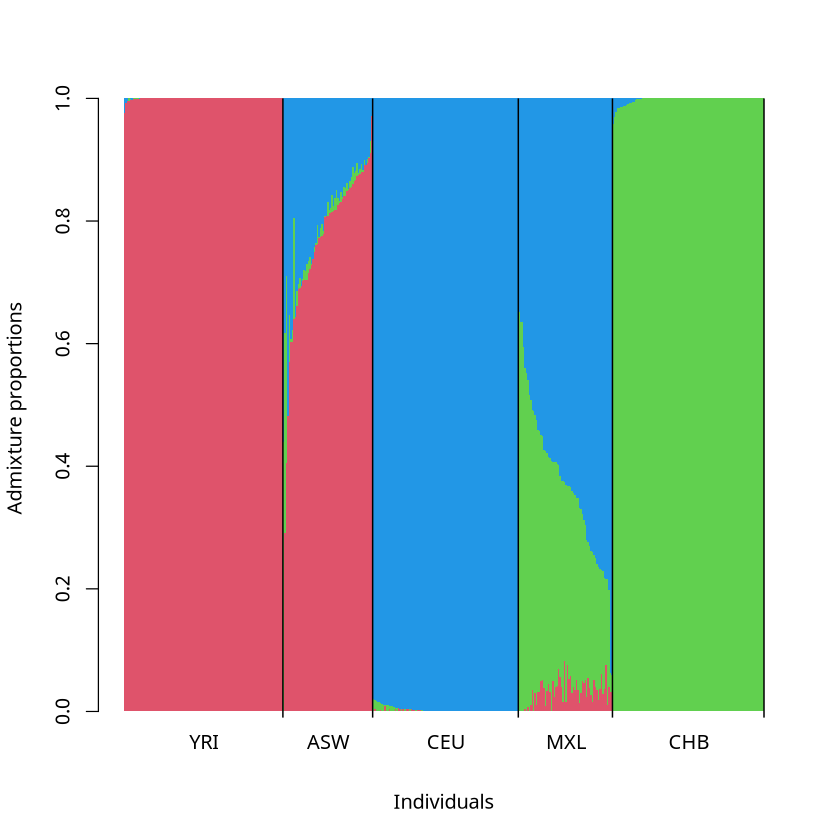

In [22]:
# Import some functions to help in visualization
#source("/home/tch_wyd/myname/shared/visFuns.R")

# Read in info to plot
pop <- read.table("./resource/1000G5pops.info", as.is = TRUE)
q <- read.table("./resource/ngsadmix_out/1000G5popsAdmixK3seed3.qopt")

# Sort individuals by population and within populations by admixture proportion
ord <- orderInds(pop = pop[,1], q = q) 

# Make plot
barplot(t(q)[,ord], col = 2:10, space = 0, border = NA, xlab = "Individuals", ylab = "Admixture proportions")
text(sort(tapply(1:nrow(pop),pop[ord,1],mean)), -0.05, unique(pop[ord,1]), xpd=T) # add population labels
abline(v = cumsum(sapply(unique(pop[ord,1]),function(x) { sum(pop[ord,1]==x) } )), col=1, lwd=1.2)

- Why do you think it looks cleaner than the previous admixture plot we visualized with the same individuals?
- How many populations would you say now are admixed? Which population seem to be the admixture source? Does that make sense given what you know of these populations?

## Assessing model fit

We will now use evalAdmix to assess if the ancestries inferred in our admixture results are a good approximation to the correct ancestries.

Again, due to time and computational limitations, we have already ran the command and just provide here the command used:

In [23]:
EVALADMIX=evalAdmix

K=3
besti=3
inbgl=./resource/1000G5pops.beagle.gz
inadmix=./resource/ngsadmix_out/1000G5popsAdmixK${K}seed${besti}
out=./resource/ngsadmix_out/1000G5pops.K${K}seed${besti}.corres

echo "$EVALADMIX -beagle $inbgl -fname ${inadmix}.fopt.gz -qname ${inadmix}.qopt -o $out -P 20"

(anders) (anders) (anders) (anders) (anders) (anders) (anders) (anders) evalAdmix -beagle ./resource/1000G5pops.beagle.gz -fname ./resource/ngsadmix_out/1000G5popsAdmixK3seed3.fopt.gz -qname ./resource/ngsadmix_out/1000G5popsAdmixK3seed3.qopt -o ./resource/ngsadmix_out/1000G5pops.K3seed3.corres -P 20
(anders) 


We will now visualize the correlation of residuals estimated by evalAdmix, and use it to assess whether the estimated admixture proportions results are a good fit to the data.

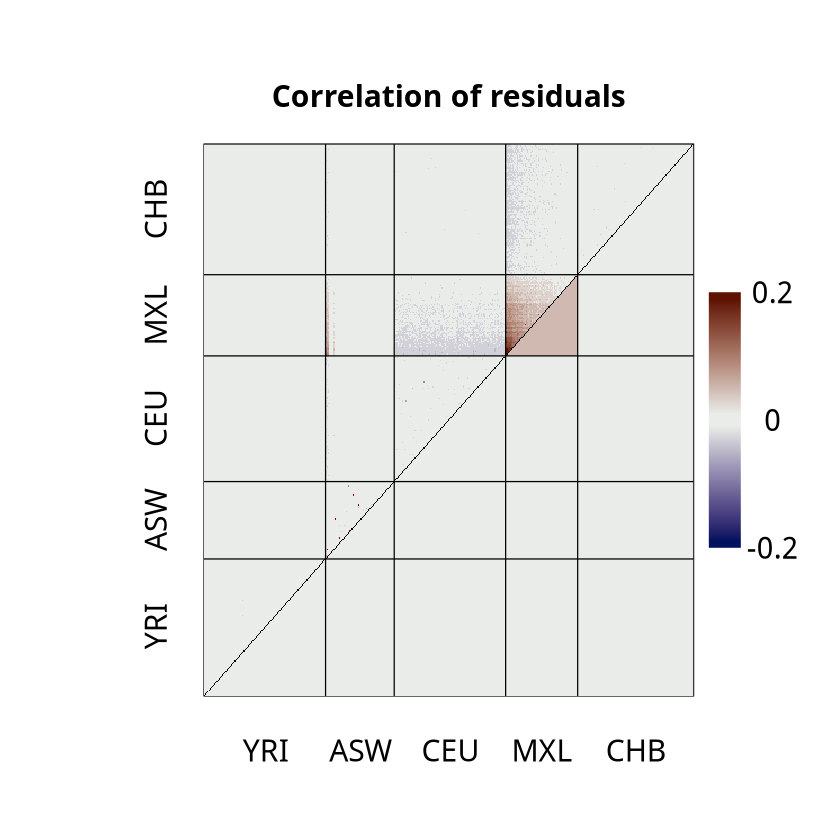

In [24]:
# Import some funcitons to help in visualization
#source("/home/tch_wyd/myname/shared/visFuns.R")

# Read in info to plot
pop <- read.table("./resource/1000G5pops.info", as.is = TRUE)
q <- read.table("./resource/ngsadmix_out/1000G5popsAdmixK3seed3.qopt")
r <- as.matrix(read.table("./resource/ngsadmix_out/1000G5pops.K3seed3.corres"))

# Sort individuals by population and within populations by admixture proportion
ord <- orderInds(pop = pop[,1], q = q) 

# Make plot
plotCorRes(r, pop = pop[,1], ord = ord, max_z = 0.2)

- Is there any population for which the estimated admixture proportions do not seem to have a good fit?
- Looking at the admixture proportions plot, can you think of a reason why that population might not be correctly modelled?

## Trying other values of K

We will now do again the analyses but using 4 instead of 3 ancestral populations. We start by doing 20 independent runs of NGSadmix, with the same setting except that this time we use K = 4. We then collect the likelihoods form the log files and look at them to assess if the optimization has converged to the global maximum likelihood.

(Again, the analyses has already been run and we just provide the code to print the commands).

In [25]:
inputpath=./resource/1000G5pops.beagle.gz
outpath=./resource/ngsadmix_out
K=4

for i in `seq 1 20`
do
    echo "$NGSadmix -likes $inputpath -K $K -P 10 -minMaf 0.05 -seed $i -o ${outpath}/1000G5popsAdmixK${K}seed${i}"
done

prefix=${outpath}/1000G5popsAdmix

{
    echo "seed loglikelihood"
    for i in `seq 1 20`
    do 
        cat ${prefix}K${K}seed$i.log |\
            grep "best like" |\
            awk -v i=$i -F "[ =]" '{print i,$3}'
    done
} | sort -rhk2 > allK$K.likes

cat allK$K.likes | column -t

(anders) (anders) (anders) (anders) NGSadmix -likes ./resource/1000G5pops.beagle.gz -K 4 -P 10 -minMaf 0.05 -seed 1 -o ./resource/ngsadmix_out/1000G5popsAdmixK4seed1
NGSadmix -likes ./resource/1000G5pops.beagle.gz -K 4 -P 10 -minMaf 0.05 -seed 2 -o ./resource/ngsadmix_out/1000G5popsAdmixK4seed2
NGSadmix -likes ./resource/1000G5pops.beagle.gz -K 4 -P 10 -minMaf 0.05 -seed 3 -o ./resource/ngsadmix_out/1000G5popsAdmixK4seed3
NGSadmix -likes ./resource/1000G5pops.beagle.gz -K 4 -P 10 -minMaf 0.05 -seed 4 -o ./resource/ngsadmix_out/1000G5popsAdmixK4seed4
NGSadmix -likes ./resource/1000G5pops.beagle.gz -K 4 -P 10 -minMaf 0.05 -seed 5 -o ./resource/ngsadmix_out/1000G5popsAdmixK4seed5
NGSadmix -likes ./resource/1000G5pops.beagle.gz -K 4 -P 10 -minMaf 0.05 -seed 6 -o ./resource/ngsadmix_out/1000G5popsAdmixK4seed6
NGSadmix -likes ./resource/1000G5pops.beagle.gz -K 4 -P 10 -minMaf 0.05 -seed 7 -o ./resource/ngsadmix_out/1000G5popsAdmixK4seed7
NGSadmix -likes ./resource/1000G5pops.beagle.gz -K 4 -

- Does it look like it has converged?

We will now run evalAdmix to assess the model fit of the best admixture run (again, it has been pre run and we just print the command):

In [26]:
EVALADMIX=evalAdmix

K=4
besti=9
inbgl=./resource/1000G5pops.beagle.gz
inadmix=./resource/ngsadmix_out/1000G5popsAdmixK${K}seed${besti}
out=./resource/ngsadmix_out/1000G5pops.K${K}seed${besti}.corres

echo "$EVALADMIX -beagle $inbgl -fname ${inadmix}.fopt.gz -qname ${inadmix}.qopt -o $out -P 20"

(anders) (anders) (anders) (anders) (anders) (anders) (anders) (anders) evalAdmix -beagle ./resource/1000G5pops.beagle.gz -fname ./resource/ngsadmix_out/1000G5popsAdmixK4seed9.fopt.gz -qname ./resource/ngsadmix_out/1000G5popsAdmixK4seed9.qopt -o ./resource/ngsadmix_out/1000G5pops.K4seed9.corres -P 20
(anders) 


We will now visualize the estimated admixture proportions and the correlation of residuals to assess their fit:

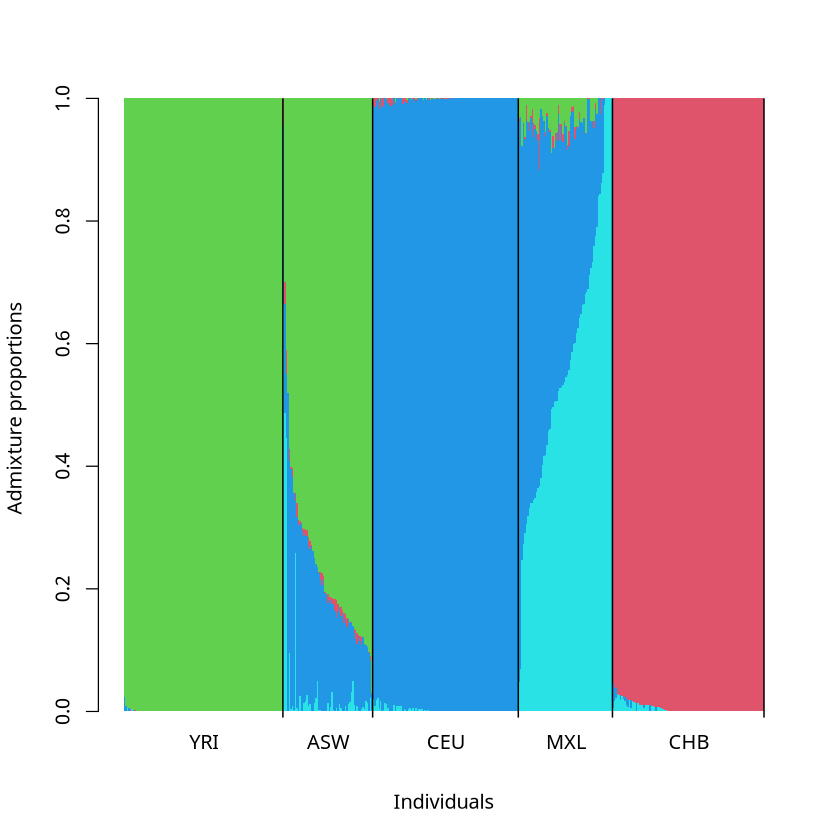

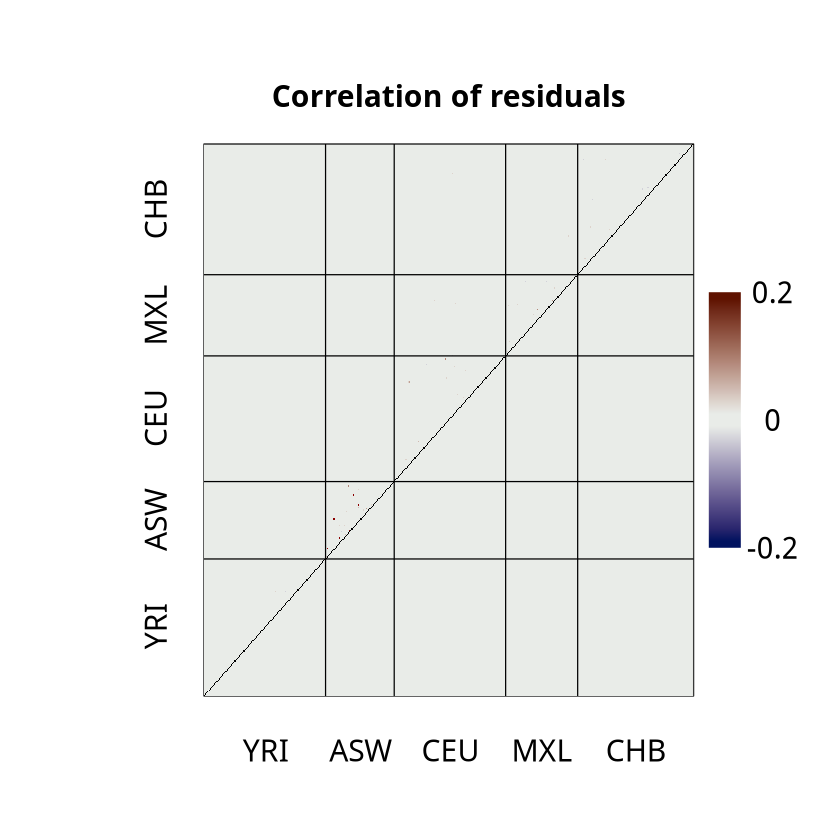

In [27]:
#source("/home/tch_wyd/myname/shared/visFuns.R")

pop <- read.table("./resource/1000G5pops.info", as.is = TRUE)
q <- read.table("./resource/ngsadmix_out/1000G5popsAdmixK4seed9.qopt")

ord <- orderInds(pop = pop[,1], q = q) # sort indiivduals by population and within populaoitn by admixture proportion

# plot admixture proportions
barplot(t(q)[,ord], col = c(5,4,2,3), space = 0, border = NA, xlab = "Individuals", ylab = "Admixture proportions")
text(sort(tapply(1:nrow(pop),pop[ord,1],mean)), -0.05, unique(pop[ord,1]), xpd = T) # add population labels
abline(v = cumsum(sapply(unique(pop[ord,1]),function(x) { sum(pop[ord,1]==x) } )), col = 1, lwd = 1.2)

r <- as.matrix(read.table("./resource/ngsadmix_out/1000G5pops.K4seed9.corres"))
plotCorRes(r, pop=pop[,1], ord=ord, max_z = 0.2)

- What population does the new cluster that we have added correspond to?
- Based on the correlation of residuals, would you say adding that cluster has given a significant improvement to the model fit?


# B. Use of fastNGSadmix to infer admixture proportions for 3 samples 
Let's try to use fastNGSadmix. Specifically, let's see if we can use it to infer the ancestry of 3 samples: sample1, sample2 and sample3.

## Setup paths

To this first setup some paths by typing this in the terminal:

In [28]:
# Set path for the fastNGSadmix program
fastNGSadmix=fastNGSadmix

# Set path for all input files you will use in this exercise
inputpath=./resource/

(anders) (anders) (anders) (anders) (anders) 


## Explore the files with the reference panel
As reference panel we will use data from these 7 populations:

| Population code/name | Description                                    | 
|-----------------|------------------------------------------------|
| French |	French individuals |
| Han	 |  Chinese individuals|
| Chukchi|	Siberian individuals |
| Karitiana	| Native American individuals |
| Papuan |	Individuals from Papua New Guinea, Melanesia |
| Sindhi |	Individuals from India |
| YRI	 | Yoruba individuals from Nigeria |

The files with genotype likelihood (GL) data from sample1, sample2 and sample3 are in beagle format — so exactly the same format as the input files you used for NGSadmix. So let's not spend time on looking at those. But before we start analysing the data then have a quick look at the files with the reference panel (nInd.txt and refPanel.txt) so you know how they look (in case you at some point want to create your own reference panel - which there are scripts for that comes with fastNGSadmix). You can do this by running the following commands:

In [29]:
# Show the full content of the file nInd.txt
# (a file that has info how many samples from each population the panel consists of)
cat ${inputpath}/nInd.txt | column -t

# Show the top 2 lines of the file refPanel.txt
# (a file that has info about allele frequencies for the 7 populations)
head -n2 ${inputpath}/refPanel.txt | column -t

(anders) (anders) French  Han  Chukchi  Karitiana  Papuan  Sindhi  Yoruba
25      33   23       12         14      18      70
(anders) (anders) (anders) (anders) id        chr  pos     name       A0_freq  A1  French             Han                 Chukchi            Karitiana           Papuan              Sindhi             Yoruba
1_752566  1    752566  rs3094315  G        A   0.166666666666667  0.0606060606060606  0.369565217391304  0.0833333333333334  0.0714285714285714  0.305555555555556  0.671428571428571
(anders) 


- How many samples from each population does the reference population consist of?
- What are the allele frequencies of the first SNP for each of the populations?


## Analyse the samples with fastNGSadmix

Let's try to run fastNGSadmix on the 3 samples one at a time with the following commands:

In [30]:
# Analyse sample1
$fastNGSadmix -likes ${inputpath}/sample1.beagle.gz -fname ${inputpath}/refPanel.txt -Nname ${inputpath}/nInd.txt -outfiles sample1 -whichPops all -conv 10 -seed 1

# Analyse sample2
$fastNGSadmix -likes ${inputpath}/sample2.beagle.gz -fname ${inputpath}/refPanel.txt -Nname ${inputpath}/nInd.txt -outfiles sample2 -whichPops all -conv 10 -seed 1

# Analyse sample3
$fastNGSadmix -likes ${inputpath}/sample3.beagle.gz -fname ${inputpath}/refPanel.txt -Nname ${inputpath}/nInd.txt -outfiles sample3 -whichPops all -conv 10 -seed 1

(anders) 	-> Dumping file: sample1.log
Input: -likes ./resource//sample1.beagle.gz -plink (null) -Nname ./resource//nInd.txt -fname ./resource//refPanel.txt -out sample1 -whichPops all
Setup: -seed 1 -method 1
Ploidy of 2 has been chosen

The accelerated EM has been chosen
The adjusted method has been chosen
Convergence: -maxIter 2000 -tol 0.00000010
The following number of bootstraps have been chosen: 0
Input has this many sites without missing data 49643
Ref has this many sites 442769
This many sites in ref are either not-valid-number or below maf in any of the chosen pops 0
Overlap: of 49643 sites between input and ref
Chosen pop French
Chosen pop Han
Chosen pop Chukchi
Chosen pop Karitiana
Chosen pop Papuan
Chosen pop Sindhi
Chosen pop Yoruba


nPop=7

Opening nInd file: ./resource//nInd.txt with nPop=7
N = 25.000000
N = 33.000000
N = 23.000000
N = 12.000000
N = 14.000000
N = 18.000000
N = 70.000000

iter[start] like is=-45599.395219
iter[10] like=-42588.237624 alpha=1.206794 Q=0.6

As you can see the way to run it is similar to NGSadmix. The options -likes and -outfiles are the same (-outfiles is the equivalent of -o in NGSadmix). But now we also have the -fname and -Nname, which allows you to specify files with your reference panel. Also notice you can ask to run multiple runs with different starting points using the option -conv which makes it easier to ensure convergence. And then there is actually one more parameter that has to be set, namely -whichPops which allows you to specify that you only want to use a subset of the populations in the reference panel, or that you want to analyze all populations. So e.g. you can re-analyse sample1 using using only 6 of the 7 populations in your reference panel (excluding the French):

In [31]:
# Re-analyse sample1 with a smaller reference panel
$fastNGSadmix -likes ${inputpath}/sample1.beagle.gz -fname ${inputpath}/refPanel.txt -Nname ${inputpath}/nInd.txt -outfiles sample1V2 -whichPops Han,Yoruba,Sindhi,Papuan,Chukchi,Karitiana -conv 10 -seed 1


(anders) 	-> Dumping file: sample1V2.log
Input: -likes ./resource//sample1.beagle.gz -plink (null) -Nname ./resource//nInd.txt -fname ./resource//refPanel.txt -out sample1V2 -whichPops Han,Yoruba,Sindhi,Papuan,Chukchi,Karitiana
Setup: -seed 1 -method 1
Ploidy of 2 has been chosen

The accelerated EM has been chosen
The adjusted method has been chosen
Convergence: -maxIter 2000 -tol 0.00000010
The following number of bootstraps have been chosen: 0
Input has this many sites without missing data 49643
Ref has this many sites 442769
This many sites in ref are either not-valid-number or below maf in any of the chosen pops 0
Overlap: of 49643 sites between input and ref
Chosen pop Han
Chosen pop Chukchi
Chosen pop Karitiana
Chosen pop Papuan
Chosen pop Sindhi
Chosen pop Yoruba


nPop=6

Opening nInd file: ./resource//nInd.txt with nPop=6
N = 33.000000
N = 23.000000
N = 12.000000
N = 14.000000
N = 18.000000
N = 70.000000

iter[start] like is=-46402.522441
iter[10] like=-43844.174959 alpha=11.

## Take a look at the output files

The output is very similar to that of NGSadmix. There is no fopt file, but there is a log file and and qopt file.

Try to look in the log files for the four analyses using the command cat, so e.g. for sample1 type:

In [32]:
# Show content of sample1.log 
cat sample1.log

(anders) Input: -likes ./resource//sample1.beagle.gz -plink (null) -Nname ./resource//nInd.txt -fname ./resource//refPanel.txt -out sample1 -whichPops all
Setup: -seed 1 -method 1
Ploidy of 2 has been chosen

The accelerated EM has been chosen
The adjusted method has been chosen
Convergence: -maxIter 2000 -tol 0.00000010
The following number of bootstraps have been chosen: 0
Input has this many sites without missing data 49643
Ref has this many sites 442769
This many sites in ref are either not-valid-number or below maf in any of the chosen pops 0
Overlap: of 49643 sites between input and ref

nPop=7

Opening nInd file: ./resource//refPanel.txt with nPop=7
Chosen pop French
N = 25.000000
Chosen pop Han
N = 33.000000
Chosen pop Chukchi
N = 23.000000
Chosen pop Karitiana
N = 12.000000
Chosen pop Papuan
N = 14.000000
Chosen pop Sindhi
N = 18.000000
Chosen pop Yoruba
N = 70.000000

This many iterations 40 for run 0

This many iterations 35 for run 1

This many iterations 53 for run 2

This

- How many loci are the 4 different analyses based on (this is in the log files and is called Overlap)?

Next try to have a look at the qopt file for sample 1 (which like for NGSadmix contains the estimated admixture proportion for the sample):

In [33]:
# Show content of sample1.qopt
cat sample1.qopt | column -t

(anders) French  Han     Chukchi  Karitiana  Papuan  Sindhi  Yoruba
0.6899  0.2296  0.0000   0.0000     0.0000  0.0000  0.0804
(anders) 


- Does the sample look admixed?

## Plot the analysis results

Instead of looking at all the qopt files then open R and plot the results for all 4 analyses:

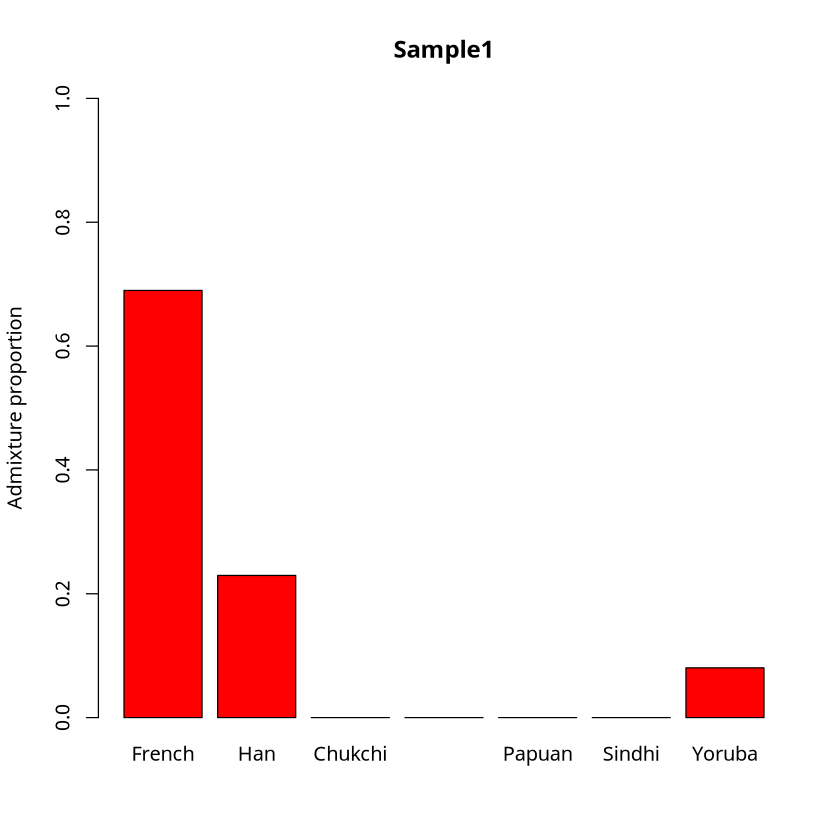

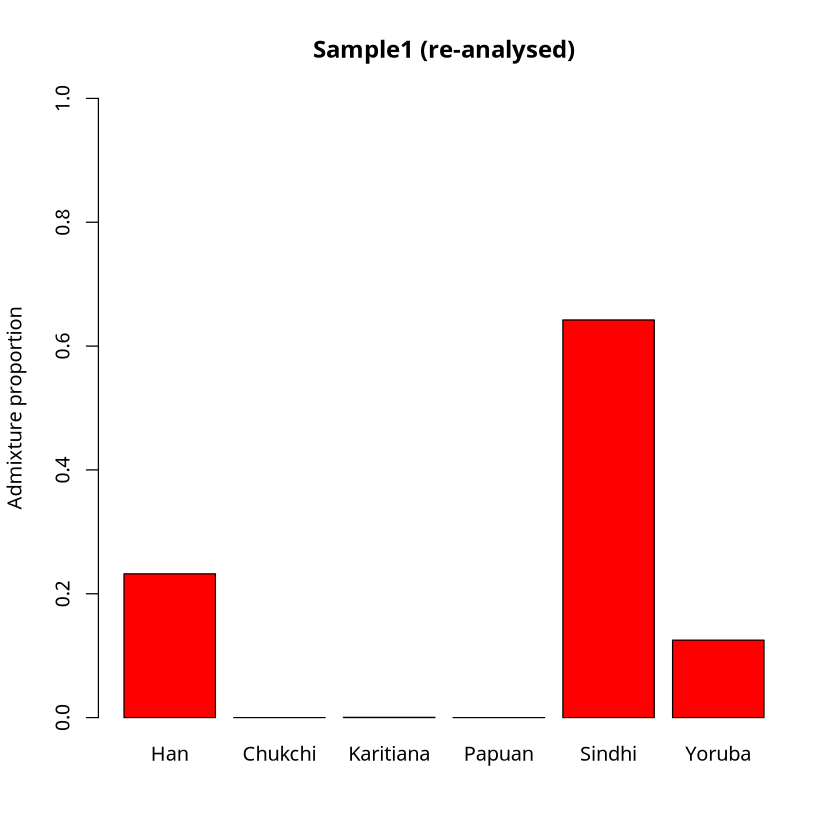

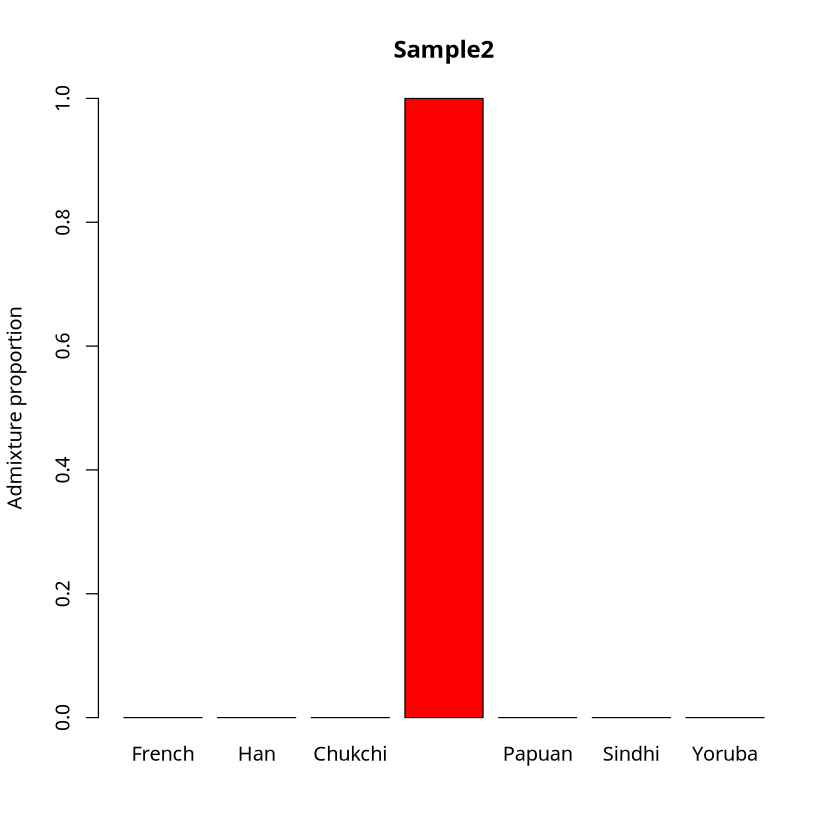

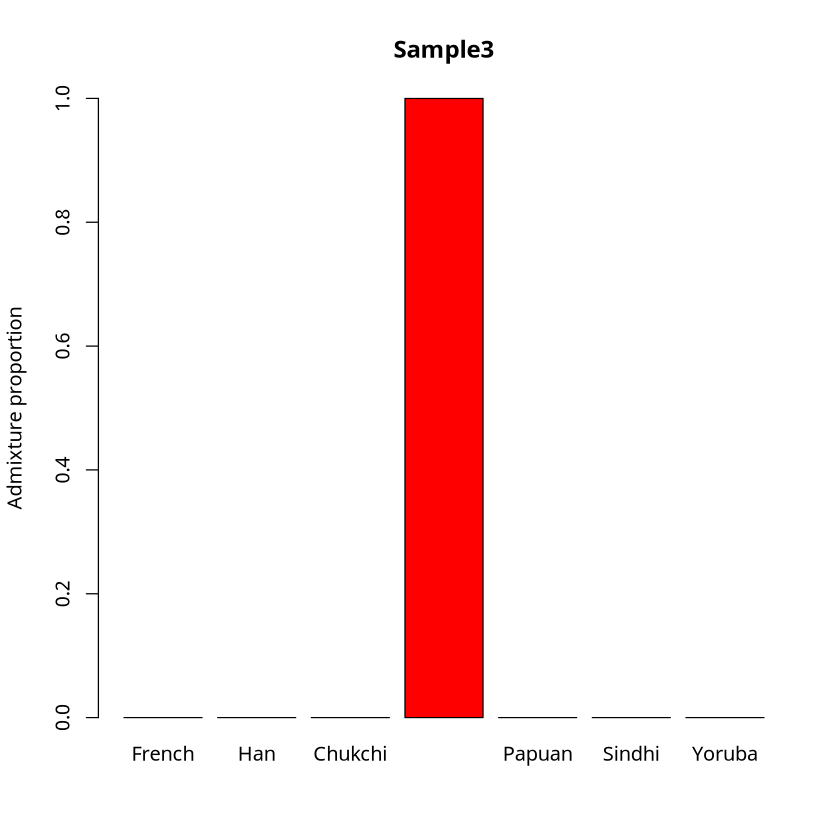

In [34]:
# Plot results for first analysis of sample1
admix <- read.table("sample1.qopt", as.is = T, h = T)
barplot(as.matrix(admix), ylab = "Admixture proportion", col = "red", ylim = c(0,1), main = "Sample1")

# Plot results for 2nd analysis of sample1 (the one where we excluded French from the reference panel)
admix<-read.table("sample1V2.qopt",as.is = T, h = T)
barplot(as.matrix(admix), ylab = "Admixture proportion", col = "red", ylim = c(0,1), main = "Sample1 (re-analysed)")

# Plot results for analysis of sample2
admix <- read.table("sample2.qopt",as.is=T,h=T)
barplot(as.matrix(admix), ylab = "Admixture proportion", col = "red", ylim = c(0,1), main = "Sample2")

# Plot results for analysis of sample3
admix<-read.table("sample3.qopt", as.is = T, h = T)
barplot(as.matrix(admix), ylab = "Admixture proportion", col = "red", ylim = c(0,1), main = "Sample3")

Based on the results: what ancestry do you think the three samples have (ignore the second analysis of sample1 for now)?
Now look at the results of the second analysis of sample1 (for which a different reference panel was used). 

- Why do you think the result depends on the reference panel and what are the consequences?
- Do you trust the results for sample2 and sample3 given the number of loci it is based on?

In order to investigate this we can let fastNGSadmix run with bootstraps, where we randomly sample (with replacement), the sites the analysis is based on. This tells us something about how susceptible our estimates are to change. Try to run fastNGSadmix with 100 bootstraps for sample2 and sample3:

In [35]:

$fastNGSadmix -likes ${inputpath}/sample2.beagle.gz -fname ${inputpath}/refPanel.txt -Nname ${inputpath}/nInd.txt -outfiles sample2boot -whichPops all -boot 100

$fastNGSadmix -likes ${inputpath}/sample3.beagle.gz -fname ${inputpath}/refPanel.txt -Nname ${inputpath}/nInd.txt -outfiles sample3boot -whichPops all -boot 100


	-> Dumping file: sample2boot.log
Input: -likes ./resource//sample2.beagle.gz -plink (null) -Nname ./resource//nInd.txt -fname ./resource//refPanel.txt -out sample2boot -whichPops all
Setup: -seed 1753323489 -method 1
Ploidy of 2 has been chosen

The accelerated EM has been chosen
The adjusted method has been chosen
Convergence: -maxIter 2000 -tol 0.00000010
The following number of bootstraps have been chosen: 100
Input has this many sites without missing data 20903
Ref has this many sites 442769
This many sites in ref are either not-valid-number or below maf in any of the chosen pops 0
Overlap: of 20903 sites between input and ref
Chosen pop French
Chosen pop Han
Chosen pop Chukchi
Chosen pop Karitiana
Chosen pop Papuan
Chosen pop Sindhi
Chosen pop Yoruba


nPop=7

Opening nInd file: ./resource//nInd.txt with nPop=7
N = 25.000000
N = 33.000000
N = 23.000000
N = 12.000000
N = 14.000000
N = 18.000000
N = 70.000000

iter[start] like is=-17458.475059
iter[10] like=-14951.730027 alpha=2.16

Notice that now the FIRST row of the .qopt files, are the estimated ancestry based on ALL sites, and that the subsequent rows, are the ones based on the bootstraps.

Now let's try to plot the results for sample3 in R by opening R and typing:

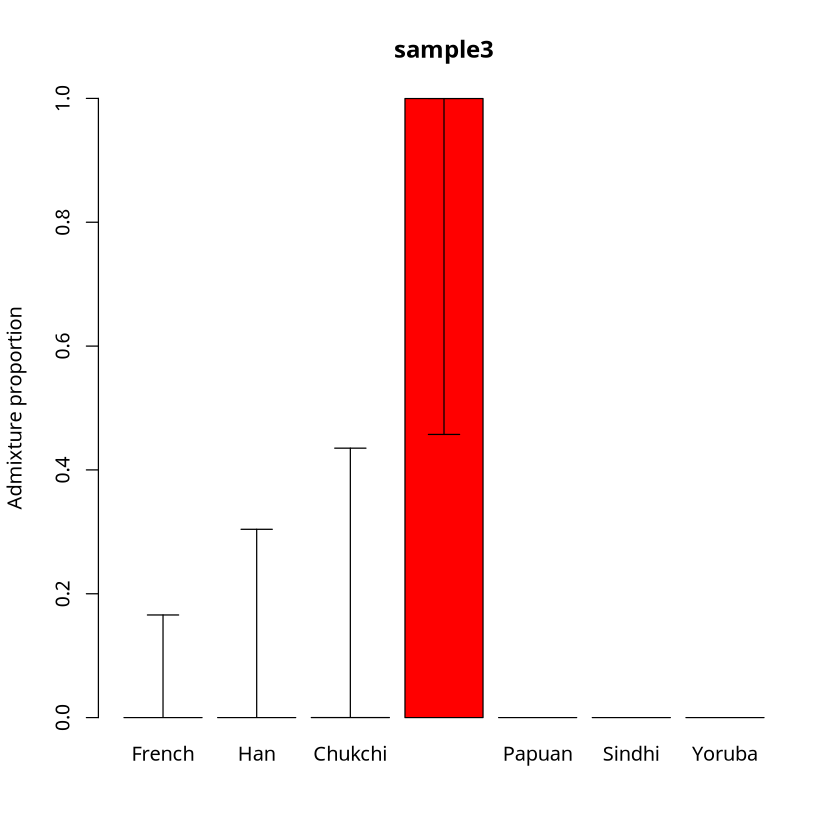

In [36]:
# Plot estimates
admix <- read.table("sample3boot.qopt", as.is = T, h = T)
b <- barplot(as.matrix(admix[1,]), main = "sample3", ylab = "Admixture proportion", col = "red", ylim = c(0,1))

# Plot confidence intervals
## - first we take the 0.025 and 0.975 sample quantiles for constructing the confidence interval for out estimates
lower <- as.numeric(apply(admix, 2, function(x) quantile(x[2:length(x)], probs = c(0.025))))
upper <- as.numeric(apply(admix, 2, function(x) quantile(x[2:length(x)], probs = c(0.975))))

## - then we plot them
segments(b, lower, b, upper)
segments(b-0.2, lower, b+0.2, lower)
segments(b-0.2, upper, b+0.2, upper)

- Can you say with confidence what the ancestry of this sample is?

Let us also plot sample2 with 100 bootstraps:

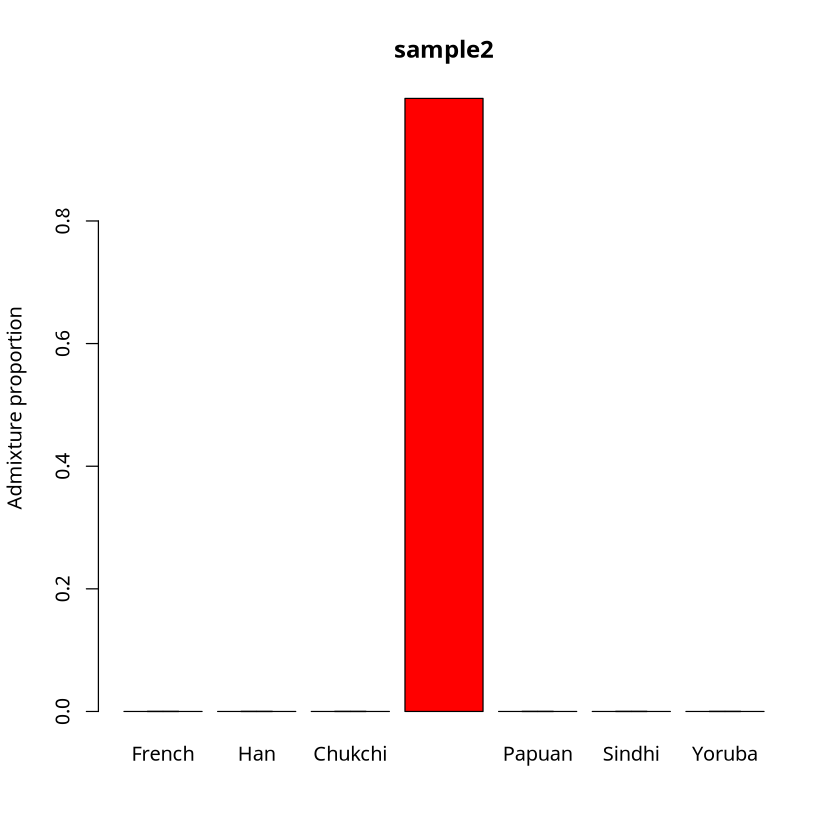

In [37]:
# Plot estimates
admix <- read.table("sample2boot.qopt",as.is = T, h = T)
b <- barplot(as.matrix(admix[1,]), main = "sample2", ylab = "Admixture proportion", col = "red")

# Plot confidence intervals
## - first we take the 0.025 and 0.975 sample quantiles for constructing the confidence interval for out estimates
lower <- as.numeric(apply(admix, 2, function(x) quantile(x[2:length(x)], probs = c(0.025))))
upper <- as.numeric(apply(admix, 2, function(x) quantile(x[2:length(x)], probs = c(0.975))))

## - then we plot them
segments(b, lower, b, upper)
segments(b-0.2, lower, b+0.2, lower)
segments(b-0.2, upper, b+0.2, upper)

- Which sample are you more sure about the ancestry of? 
- What explains the difference between the 2 plots?